# 1. Carga y Exploración de Datos:

Descargar y cargar el dataset.
Realizar una exploración inicial para entender la estructura del dataset.
Identificar valores faltantes, duplicados y outliers.


In [12]:
import pandas as pd

In [14]:
path = "/content/drive/MyDrive/BBDD/vehicles.parquet"
df = pd.read_parquet(path)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [16]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,None,None,None,None,...,None,None,None,None,None,NaN,az,NaN,NaN,None
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,None,None,None,None,...,None,None,None,None,None,NaN,ar,NaN,NaN,None
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,None,None,None,None,...,None,None,None,None,None,NaN,fl,NaN,NaN,None
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,None,None,None,None,...,None,None,None,None,None,NaN,ma,NaN,NaN,None
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,None,None,None,None,...,None,None,None,None,None,NaN,nc,NaN,NaN,None


In [17]:
df.dtypes

,0
id,int64
url,object
region,object
region_url,object
price,int64
year,float64
manufacturer,object
model,object
condition,object
cylinders,object


In [18]:
df.columns = df.columns.str.lower().str.strip()

In [19]:
# Revisar duplicados.
df[df.duplicated()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date


In [20]:
# Verificar valores nulos
print(df.isnull().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
vin             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [21]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


# 2. Limpieza y Preprocesamiento:

Manejar valores faltantes.
Eliminar duplicados.
Corregir inconsistencias en los datos categóricos.
Escalar las características numéricas.
Realizar transformaciones necesarias para las características categóricas.

In [22]:
# Se completas los datos null con la media
num_columns = ['year', 'odometer']
for column in num_columns:
    df[column] = df[column].fillna(df[column].mean())

In [24]:
def rellenar_mode(column):
    if column.isna().all():
        # si tiene valor NaN, se rellena con Unknown
        return column.fillna('Unknown')
    else:
        # en caso contartio se llena con la moda
        mode_value = column.mode()[0]
        return column.fillna(mode_value)

# Rellenar valiables object
Col_rellenar = cat_columns = ['manufacturer', 'model', 'condition', 'cylinders','fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']

for column in Col_rellenar:
    if column in df.columns:
       df[column] = rellenar_mode(df[column])

In [25]:
# Verificar valores nulos
print(df.isnull().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
vin             161042
drive                0
size            306361
type                 0
paint_color          0
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [26]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,2011.235191,ford,f-150,good,6 cylinders,...,None,sedan,white,None,None,NaN,az,NaN,NaN,None
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,2011.235191,ford,f-150,good,6 cylinders,...,None,sedan,white,None,None,NaN,ar,NaN,NaN,None
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,2011.235191,ford,f-150,good,6 cylinders,...,None,sedan,white,None,None,NaN,fl,NaN,NaN,None
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,2011.235191,ford,f-150,good,6 cylinders,...,None,sedan,white,None,None,NaN,ma,NaN,NaN,None
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,2011.235191,ford,f-150,good,6 cylinders,...,None,sedan,white,None,None,NaN,nc,NaN,NaN,None


In [27]:
# eliminacion de columnas que no tienen datos que aporten al modelo
columns_to_drop = [
    'id', 'url', 'region_url', 'vin', 'image_url', 'description', 'county', 'lat', 'long', 'size', 'state'
]
df.drop(columns = columns_to_drop, inplace=True)

In [28]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,posting_date
0,prescott,6000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,None
1,fayetteville,11900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,None
2,florida keys,21000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,None
3,worcester / central MA,1500,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,None
4,greensboro,4900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,None


In [29]:
# Verificar valores nulos
print(df.isnull().sum())

region           0
price            0
year             0
manufacturer     0
model            0
condition        0
cylinders        0
fuel             0
odometer         0
title_status     0
transmission     0
drive            0
type             0
paint_color      0
posting_date    68
dtype: int64


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          426880 non-null  float64
 3   manufacturer  426880 non-null  object 
 4   model         426880 non-null  object 
 5   condition     426880 non-null  object 
 6   cylinders     426880 non-null  object 
 7   fuel          426880 non-null  object 
 8   odometer      426880 non-null  float64
 9   title_status  426880 non-null  object 
 10  transmission  426880 non-null  object 
 11  drive         426880 non-null  object 
 12  type          426880 non-null  object 
 13  paint_color   426880 non-null  object 
 14  posting_date  426812 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 48.9+ MB


In [31]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,posting_date
0,prescott,6000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,None
1,fayetteville,11900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,None
2,florida keys,21000,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,None
3,worcester / central MA,1500,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,None
4,greensboro,4900,2011.235191,ford,f-150,good,6 cylinders,gas,98043.331443,clean,automatic,4wd,sedan,white,None


In [32]:
# Eliminar la palabra cylindres
dict_1 = {
    '3 cylinders': "3",
    '4 cylinders': "4",
    '5 cylinders': "5",
    '6 cylinders': "6",
    '8 cylinders': "8",
    '10 cylinders': "10",
    '12 cylinders': "12",
    'other': "0"
}
df["cylinders"] = df["cylinders"].replace(dict_1)
df["cylinders"].value_counts()


,count
cylinders,
6,271847
4,77642
8,72062
5,1712
10,1455
0,1298
3,655
12,209


In [33]:
df.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,posting_date
0,prescott,6000,2011.235191,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None
1,fayetteville,11900,2011.235191,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None
2,florida keys,21000,2011.235191,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None
3,worcester / central MA,1500,2011.235191,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None
4,greensboro,4900,2011.235191,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None
5,hudson valley,1600,2011.235191,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None
6,hudson valley,1000,2011.235191,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None
7,hudson valley,15995,2011.235191,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None
8,medford-ashland,5000,2011.235191,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None
9,erie,3000,2011.235191,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None


In [34]:
# Revisamos duplicados
df.duplicated().sum()

np.int64(39)

In [35]:
# Eliminamos duplicados
df.drop_duplicates(inplace=True)

In [36]:
# Corrección de columna year
df['year'] = df['year'].astype(int)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426841 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426841 non-null  object 
 1   price         426841 non-null  int64  
 2   year          426841 non-null  int64  
 3   manufacturer  426841 non-null  object 
 4   model         426841 non-null  object 
 5   condition     426841 non-null  object 
 6   cylinders     426841 non-null  object 
 7   fuel          426841 non-null  object 
 8   odometer      426841 non-null  float64
 9   title_status  426841 non-null  object 
 10  transmission  426841 non-null  object 
 11  drive         426841 non-null  object 
 12  type          426841 non-null  object 
 13  paint_color   426841 non-null  object 
 14  posting_date  426784 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 52.1+ MB


In [38]:
print(type(df['year'].iloc[0]))

<class 'numpy.int64'>


In [39]:
# Validacion de duplicados
df.duplicated().sum()

np.int64(0)

In [40]:
df.shape

(426841, 15)

In [41]:
df['type'].value_counts()

,count
type,
sedan,179898
SUV,77275
pickup,43508
truck,35273
other,22108
coupe,19204
hatchback,16595
wagon,10751
van,8548


In [42]:
# Agrupamos para buscar parámetros Outlinear.
df.groupby(["price", "manufacturer"]).size()

price       manufacturer 
0           acura            271
            alfa-romeo        27
            aston-martin       3
            audi             393
            bmw              954
                            ... 
1234567890  volvo              1
1410065407  jeep               1
3009548743  chevrolet          1
3024942282  mercedes-benz      2
3736928711  toyota             2
Length: 51661, dtype: int64

In [43]:
# Respaldamos el DF para conservar los cambios.
df_1 = df

In [44]:
# Eliminamos Outlinear
df_1 = df_1[df["price"] >= 10000]
df_1.shape

(251899, 15)

In [45]:
# Agrupamos para buscar parámetros Outlinear.
df_1.groupby(["price", "manufacturer"]).size()

price       manufacturer 
10000       acura             4
            audi             19
            bmw              42
            buick            12
            cadillac         26
                             ..
1234567890  volvo             1
1410065407  jeep              1
3009548743  chevrolet         1
3024942282  mercedes-benz     2
3736928711  toyota            2
Length: 35500, dtype: int64

In [46]:
# vemos el tamaño de la data.
df_1.shape

(251899, 15)

In [47]:
# Eliminamos Outlinear y vemos el tamaño de la data.
df_1 = df_1[df_1["price"] < 12345678]
df_1.shape

(251871, 15)

In [48]:
# Agrupamos para buscar parámetros Outlinear.
df_1.groupby(["price", "manufacturer"]).size()

price     manufacturer
10000     acura            4
          audi            19
          bmw             42
          buick           12
          cadillac        26
                          ..
3226714   ford             1
5000000   ford             1
6995495   dodge            1
10004000  ford             1
11111111  chevrolet        1
Length: 35482, dtype: int64

In [72]:
# Eliminamos Outlinear > 400000
df_1 = df_1[df_1["price"] < 400000]
df_1.shape

(251827, 15)

In [73]:
df_1.groupby(["price", "manufacturer"]).size()

price   manufacturer
10000   acura            4
        audi            19
        bmw             42
        buick           12
        cadillac        26
                        ..
299500  ford             4
299991  ford             4
304995  porsche          3
347999  ferrari          1
349999  ferrari          1
Length: 35458, dtype: int64

In [74]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251827 entries, 1 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        251827 non-null  object 
 1   price         251827 non-null  int64  
 2   year          251827 non-null  int64  
 3   manufacturer  251827 non-null  object 
 4   model         251827 non-null  object 
 5   condition     251827 non-null  object 
 6   cylinders     251827 non-null  object 
 7   fuel          251827 non-null  object 
 8   odometer      251827 non-null  float64
 9   title_status  251827 non-null  object 
 10  transmission  251827 non-null  object 
 11  drive         251827 non-null  object 
 12  type          251827 non-null  object 
 13  paint_color   251827 non-null  object 
 14  posting_date  251800 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 30.7+ MB


# 3. Exploración de Datos:

Crear visualizaciones univariadas y multivariadas.
Calcular estadísticas descriptivas.

In [75]:
df_1.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,posting_date
1,fayetteville,11900,2011,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None
2,florida keys,21000,2011,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None
7,hudson valley,15995,2011,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None
15,bellingham,13995,2011,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None
16,bellingham,24999,2011,ford,f-150,good,6,gas,98043.331443,clean,automatic,4wd,sedan,white,None


<Figure size 800x600 with 0 Axes>

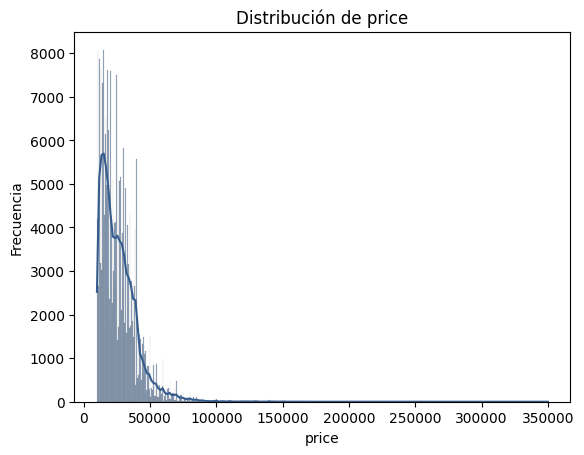

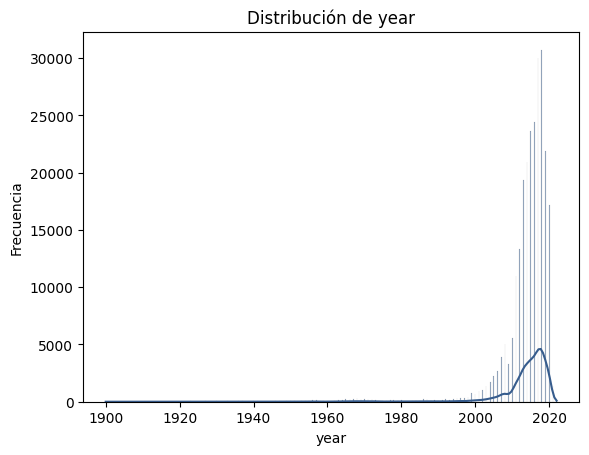

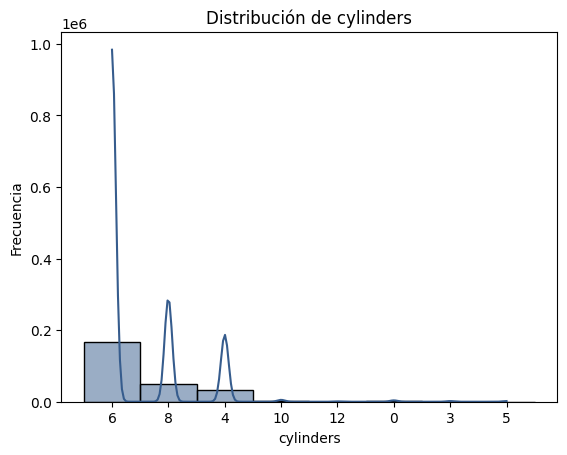

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

df_encoder = df_1

variables_numericas = ['price', 'year', 'cylinders']
color_pastel = sns.color_palette("viridis")[1]
plt.figure(figsize=(8, 6))
for col in variables_numericas:
    plt.figure()
    sns.histplot(df_encoder[col], kde=True, color=color_pastel)
    plt.title("Distribución de " + col, fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel("Frecuencia", fontsize=10)
    plt.show()


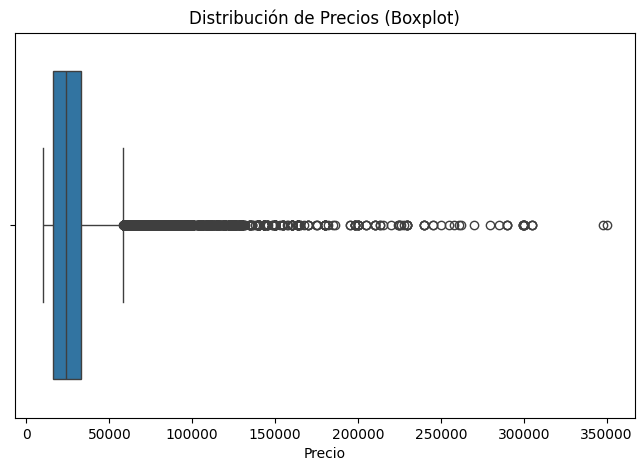

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_1['price'])
plt.title('Distribución de Precios (Boxplot)')
plt.xlabel('Precio')
plt.show()

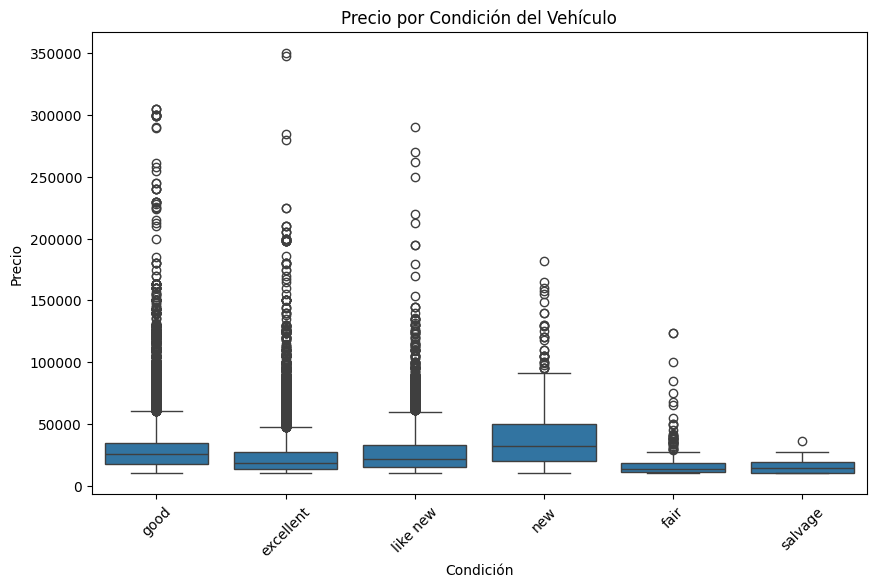

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df_1)
plt.title('Precio por Condición del Vehículo')
plt.xlabel('Condición')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

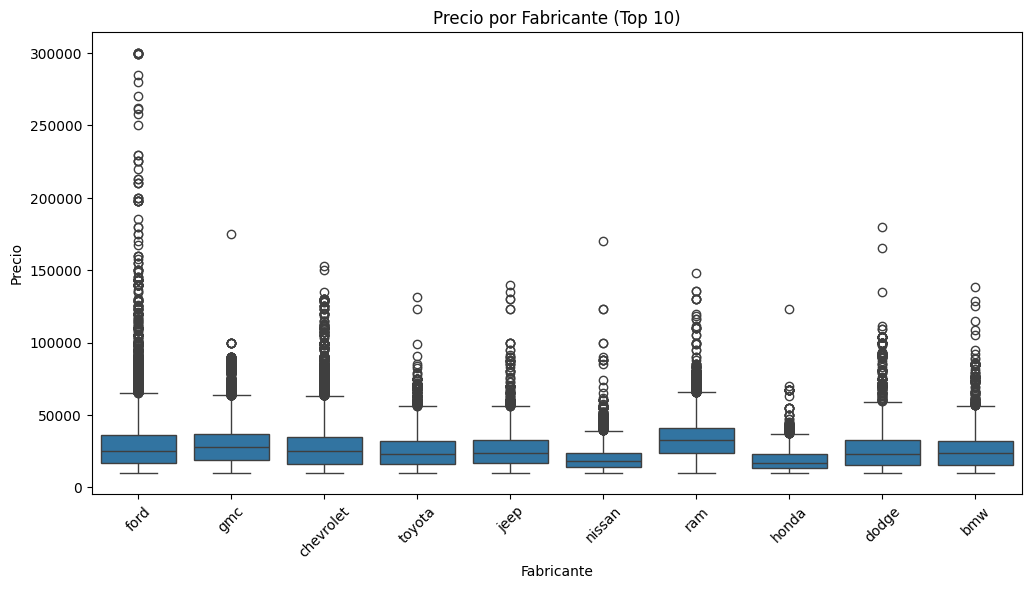

In [80]:
top_manufacturers = df['manufacturer'].value_counts().nlargest(10).index
df_top = df_1[df_1['manufacturer'].isin(top_manufacturers)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=df_top)
plt.title('Precio por Fabricante (Top 10)')
plt.xlabel('Fabricante')
plt.ylabel('Precio')
plt.xticks(rotation=45)
plt.show()

# 4. Modelado y Evaluación:

Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).
Evaluar los modelos utilizando MSE, RMSE, y R^2.
Seleccionar el mejor modelo basado en las métricas de evaluación.

In [81]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.impute import SimpleImputer


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [82]:
df_1.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'paint_color', 'posting_date'],
      dtype='object')

In [83]:
df_1.dtypes

,0
region,object
price,int64
year,int64
manufacturer,object
model,object
condition,object
cylinders,object
fuel,object
odometer,float64
title_status,object


In [84]:
# Variables numéricas y categóricas

num_features = ['year', 'odometer']
cat_features = ['condition', 'cylinders', 'fuel','title_status',
                'transmission', 'drive', 'type', 'paint_color']

X = df_1[num_features + cat_features]
y = df_1['price']


In [85]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])


In [86]:
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])


In [87]:
# Separar conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Modelo de Regresión Lineal
lr = LinearRegression()

# Apply preprocessor to training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Fit del modelo
lr.fit(X_train_processed, y_train)

# Predicción
y_pred_lr = lr.predict(X_test_processed)

# Evaluación
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regresión Lineal")
print(f" - MSE:  {mse_lr:.2f}")
print(f" - RMSE: {rmse_lr:.2f}")
print(f" - R²:   {r2_lr:.3f}")

Regresión Lineal
 - MSE:  152171436.01
 - RMSE: 12335.78
 - R²:   0.263


**Resultado de Regresión Lineal**

Regresión Lineal
 - MSE:  152171436.01
 - RMSE: 12335.78
 - R²:   0.263

In [91]:
# Modelo Random Forest
rf = RandomForestRegressor(random_state=42, n_estimators=10)

# Apply preprocessor to training and testing data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


# Fit the model on the processed data
rf.fit(X_train_processed, y_train)

# Predicción
y_pred_rf = rf.predict(X_test_processed)

# Evaluación
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest")
print(f" - MSE:  {mse_rf:.2f}")
print(f" - RMSE: {rmse_rf:.2f}")
print(f" - R²:   {r2_rf:.3f}")

Random Forest
 - MSE:  46593582.10
 - RMSE: 6825.95
 - R²:   0.774


**Resultado de Random Forest**

Random Forest
 - MSE:  46593582.10
 - RMSE: 6825.95
 - R²:   0.774

In [92]:
def evaluar(y_true, y_pred, nombre_modelo):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{nombre_modelo}")
    print(f"   - MSE:  {mse:.2f}")
    print(f"   - RMSE: {rmse:.2f}")
    print(f"   - R²:   {r2:.3f}\n")
    return mse, rmse, r2

mse_lr, rmse_lr, r2_lr = evaluar(y_test, y_pred_lr, "Regresión Lineal")
mse_rf, rmse_rf, r2_rf = evaluar(y_test, y_pred_rf, "Random Forest")

Regresión Lineal
   - MSE:  152171436.01
   - RMSE: 12335.78
   - R²:   0.263

Random Forest
   - MSE:  46593582.10
   - RMSE: 6825.95
   - R²:   0.774



Los resultados obtenidos son:

**Regresión Lineal**
   - MSE:  152171436.01
   - RMSE: 12335.78
   - R²:   0.263

**Random Forest**
   - MSE:  46593582.10
   - RMSE: 6825.95
   - R²:   0.774

# Seleccionar y Optimizar el mejor modelo

In [96]:
# Supongamos que RandomForest fue mejor

param_grid = {
    'regressor__n_estimators': [10, 20],
}

grid_rf = GridSearchCV(pipe_rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Mejor configuración Random Forest:")
print(grid_rf.best_params_)

# Re-evaluar
best_rf = grid_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
evaluar(y_test, y_pred_best_rf, "Random Forest Optimizado")

Mejor configuración Random Forest:
{'regressor__n_estimators': 20}
Random Forest Optimizado
   - MSE:  45191639.47
   - RMSE: 6722.47
   - R²:   0.781



(45191639.46807718, np.float64(6722.472719771883), 0.7810956082862663)

**Mejor configuración Random Forest:**
**{'regressor__n_estimators': 20}**

Random Forest Optimizado
   - MSE:  45191639.47
   - RMSE: 6722.47
   - R²:   0.781

(45191639.46807718, np.float64(6722.472719771883), 0.7810956082862663)

# 5. Optimización del Modelo:

Optimizar el modelo seleccionado utilizando GridSearchCV.

In [98]:
from sklearn.model_selection import GridSearchCV

# Solo optimizamos el mejor modelo (supongamos Random Forest fue mejor)
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42,))])

param_grid = {
    'regressor__n_estimators': [2, 20]
}

grid = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Evaluar modelo final
best_model = grid.best_estimator_
y_pred_final = best_model.predict(X_test)

print("Mejor configuración encontrada:")
print(grid.best_params_)

print("\nEvaluación final del modelo optimizado:")
print(f"   - MSE:  {mean_squared_error(y_test, y_pred_final):.2f}")
print(f"   - RMSE: {np.sqrt(rmse):.2f}")
print(f"   - R²:   {r2_score(y_test, y_pred_final):.3f}")

Mejor configuración encontrada:
{'regressor__n_estimators': 20}

Evaluación final del modelo optimizado:
   - MSE:  45191639.47
   - RMSE: 6825.95
   - R²:   0.781


**Mejor configuración encontrada: al igual que la simulación anterior
{'regressor__n_estimators': 20}**

Evaluación final del modelo optimizado:
   - MSE:  45191639.47
   - RMSE: 6825.95
   - R²:   0.781

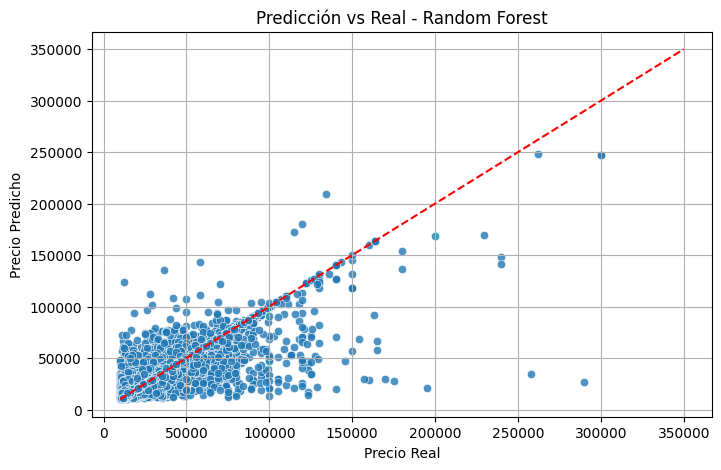

In [99]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_final, alpha=0.8)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicción vs Real - Random Forest')
plt.grid(True)
plt.show()

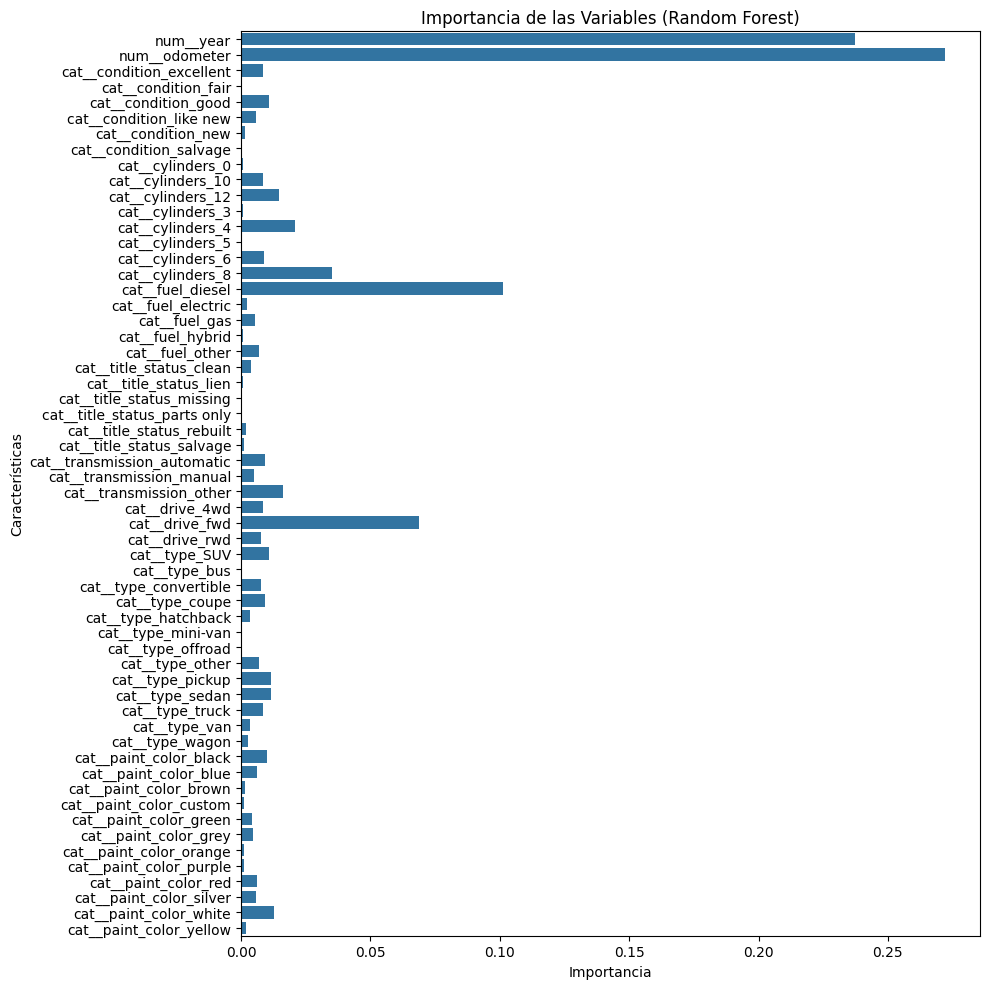

In [101]:
importancia = best_rf.named_steps['regressor'].feature_importances_
# Get feature names from the preprocessor
feature_names = best_rf.named_steps['preprocessor'].get_feature_names_out()

plt.figure(figsize=(10,10))
sns.barplot(x=importancia, y=feature_names)
plt.title("Importancia de las Variables (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# 6. Documentación y Entrega:

Documentar todo el proceso en un archivo .ipynb claramente comentado.
Crear visualizaciones con interpretaciones.
Subir el archivo a un repositorio en GitHub con un tag de liberación.